In [3]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [4]:
Mall_dataset=pd.read_csv('/content/180041257_dataset.csv')

In [5]:
Mall_dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
X = Mall_dataset.iloc[:, [3, 4]].values

In [7]:
Mall_dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
X.shape

(200, 2)

In [9]:
m=X.shape[0]
n_iter=100

In [10]:
Mall_dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
Mall_dataset.shape

(200, 5)

In [12]:
X.shape

(200, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

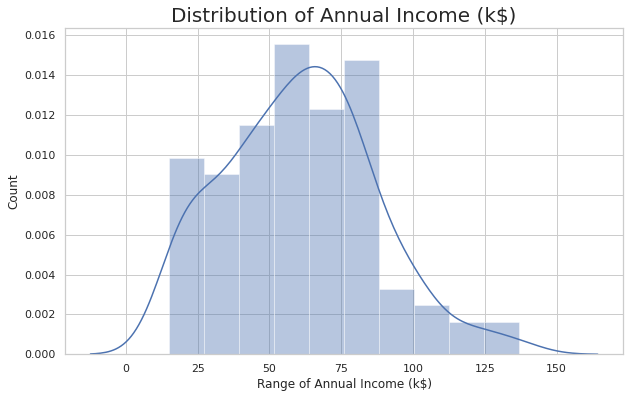

In [13]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(Mall_dataset['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

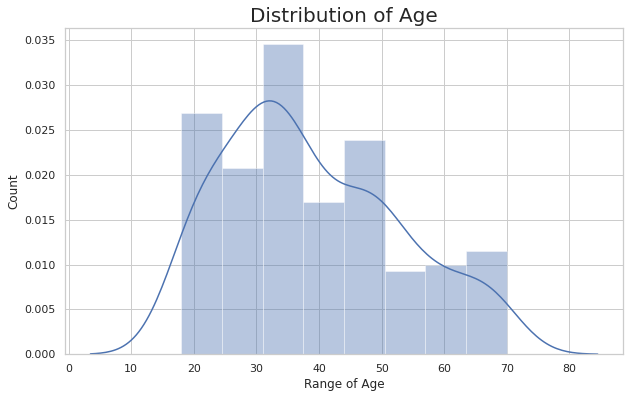

In [15]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(Mall_dataset['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

In [16]:
#We take just the Annual Income and Spending score
data_v=Mall_dataset[["CustomerID","Genre","Age","Annual Income (k$)","Spending Score (1-100)"]]
X_1=data_v[["Annual Income (k$)","Spending Score (1-100)"]]

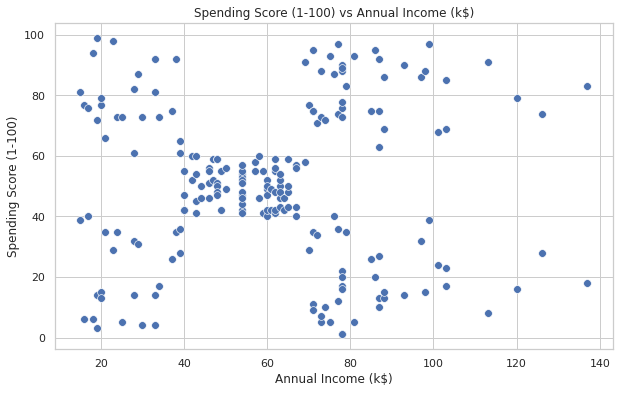

In [17]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X_1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

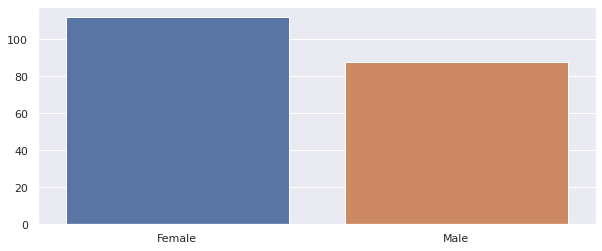

In [18]:
genders = Mall_dataset.Genre.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [46]:
class Kmeans:
    def __init__(self,X,K):
        self.X=X
        self.Output={}
        self.Centroids=np.array([]).reshape(self.X.shape[1],0)
        self.K=K
        self.m=self.X.shape[0]
        
    def kmeanspp(self,X,K):
        i=rd.randint(0,X.shape[0])
        Centroid_temp=np.array([X[i]])
        for k in range(1,K):
            D=np.array([]) 
            for x in X:
                D=np.append(D,np.min(np.sum((x-Centroid_temp)**2)))
            prob=D/np.sum(D)
            cummuprob=np.cumsum(prob)
            r=rd.random()
            i=0
            for j,p in enumerate(cummuprob):
                if r<p:
                    i=j
                    break
            Centroid_temp=np.append(Centroid_temp,[X[i]],axis=0)
        return Centroid_temp.T
    
    def rand(self,n_iter):
        self.Centroids=self.kmeanspp(self.X,self.K)
        for n in range(n_iter):
            Eucl_Dis=np.array([]).reshape(self.m,0)
            for k in range(self.K):
                tempDist=np.sum((self.X-self.Centroids[:,k])**2,axis=1)
                Eucl_Dis=np.c_[Eucl_Dis,tempDist]
            C=np.argmin(Eucl_Dis,axis=1)+1
            Y={}
            for k_v in range(self.K):
                Y[k_v+1]=np.array([]).reshape(2,0)
            for a in range(self.m):
                Y[C[a]]=np.c_[Y[C[a]],self.X[a]]
        
            for k_v in range(self.K):
                Y[k_v+1]=Y[k_v+1].T
            for k_v in range(self.K):
                self.Centroids[:,k_v]=np.mean(Y[k_v+1],axis=0)                
            self.Output=Y
    def predict(self):
        return self.Output,self.Centroids.T
    
    def WCSS_calc(self):
        wcss=0
        for k_v in range(self.K):
            wcss+=np.sum((self.Output[k_vk+1]-self.Centroids[:,k_v])**2)
        return WCSS_calc

In [47]:
WS_arr=np.array([])
for K in range(1,11):
    kmeans=Kmeans(X,K)
    kmeans.rand(n_iter)
    Output,Centroids=kmeans.predict()
    wcss=0
    for k_v in range(K):
        wcss+=np.sum((Output[k_v+1]-Centroids[k_v,:])**2)
    WS_arr=np.append(WS_arr,wcss)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


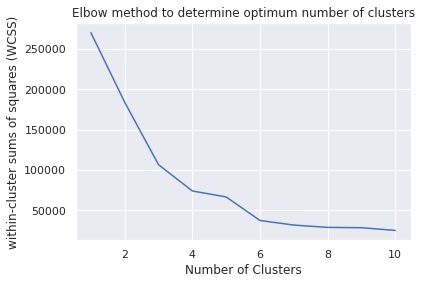

In [45]:
K_array=np.arange(1,11,1)
plt.plot(K_array,WS_arr)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

In [51]:
#based on these observations we choose 5 as optimum number of clusters
K=5

In [49]:
kmeans=Kmeans(X,K)
kmeans.rand(n_iter)
Output,Centroids=kmeans.predict()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


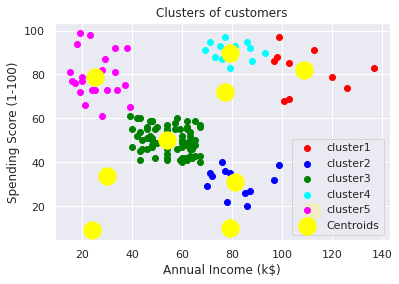

In [52]:
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[:,0],Centroids[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()